In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

We will use California Housing datasets for using a dummy functional api

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

The above database contains
* 20640 datas of house
* 9 feature with 8 numerics 
* This 8 numeric features is independend
* The rest 1 feature in dependend

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


Here we are separating data into train datasets, test datasets and validation datasets using "train_test_split"

In [5]:
from sklearn.model_selection import train_test_split
x_trainFull, x_test, y_trainFull, y_test = train_test_split(housing.data, housing.target, random_state = 42)
x_train, x_valid, y_train, y_valid = train_test_split(x_trainFull, y_trainFull)

Standardization of Data

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_valid = scaler.transform(x_valid)

# Functional Api

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

Here we will use functional api
and suppose our model consists of 
* one input layer 
* two hidden layer
* one concatenate layer(wide)
* one output
Also this model is called "WIDE AND DEEP" network
                   

In [8]:
inputLayer = keras.layers.Input(shape = x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = "relu")(inputLayer)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concate = keras.layers.concatenate([inputLayer, hidden2])
output = keras.layers.Dense(1)(concate)

model = keras.models.Model(inputs = [inputLayer], outputs = [output])


Now lets see our model

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

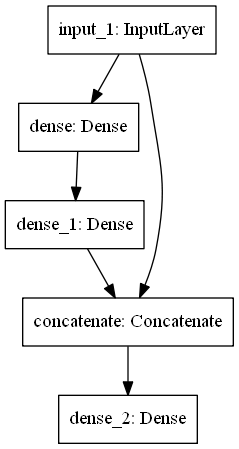

In [10]:
import pydot
keras.utils.plot_model(model)

Now we will set up the learning process for the model and training our model

In [11]:
model.compile(loss = "mean_squared_error",
             optimizer = keras.optimizers.SGD(lr = 1e-3),
             metrics = ["mae"])

In [12]:
model_history = model.fit(x_train, y_train, epochs = 40, validation_data = (x_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/40
11610/11610 [==============================] - 2s 129us/sample - loss: 1.3157 - mae: 0.7958 - val_loss: 1.9048 - val_mae: 0.6220
Epoch 2/40
11610/11610 [==============================] - 1s 87us/sample - loss: 0.7217 - mae: 0.5876 - val_loss: 1.8814 - val_mae: 0.6158
Epoch 3/40
11610/11610 [==============================] - 1s 89us/sample - loss: 0.6397 - mae: 0.5645 - val_loss: 0.8573 - val_mae: 0.5547
Epoch 4/40
11610/11610 [==============================] - 1s 87us/sample - loss: 0.6036 - mae: 0.5511 - val_loss: 0.6643 - val_mae: 0.5394
Epoch 5/40
11610/11610 [==============================] - 1s 89us/sample - loss: 0.5582 - mae: 0.5353 - val_loss: 0.5333 - val_mae: 0.5216
Epoch 6/40
11610/11610 [==============================] - 1s 87us/sample - loss: 0.5417 - mae: 0.5267 - val_loss: 0.5219 - val_mae: 0.5142
Epoch 7/40
11610/11610 [==============================] - 1s 89us/sample - loss: 0.5225 - mae: 0.5173 - val_loss: 0.

In [13]:
model_history.params

{'batch_size': 32,
 'epochs': 40,
 'steps': 363,
 'samples': 11610,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'mae', 'val_loss', 'val_mae']}

In [14]:
model_history.history

{'loss': [1.3157237361567888,
  0.7216670242493569,
  0.6396683615512831,
  0.6035518453231051,
  0.5581503428846059,
  0.5417100679761474,
  0.5225052062213472,
  0.5099258365351819,
  0.4970418379288311,
  0.4865507933315175,
  0.4765112007259809,
  0.4674854658114099,
  0.45974453334455134,
  0.45228128348518093,
  0.4458851858421608,
  0.43993325314831877,
  0.4344251944626538,
  0.4303565025534946,
  0.4252298196567532,
  0.4213808191325724,
  0.41790633487044276,
  0.41447455708216635,
  0.4112433101933748,
  0.4086870001935425,
  0.4061506102251452,
  0.40347225749215415,
  0.40155494764999106,
  0.39917530880007224,
  0.39714583298135275,
  0.39486339081473437,
  0.3932324059147141,
  0.39157915213927436,
  0.3898679377856078,
  0.38820737743562506,
  0.3865552418556427,
  0.38512853197143776,
  0.3836304078165772,
  0.38232426279891063,
  0.3809059082845693,
  0.37947221172975115],
 'mae': [0.7958007,
  0.5875551,
  0.56451434,
  0.5510638,
  0.5353479,
  0.5266784,
  0.517307

Now to see different aspect of the model

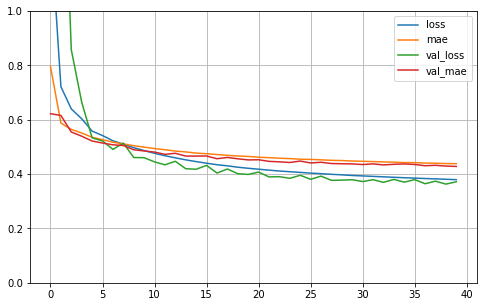

In [15]:
pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Now we are going to evaluate performance and predict data for our mode

Now we will evaluate our model using "evaluate()" method on our model object 

In [16]:
mae_test = model.evaluate(x_test, y_test)

5160/5160 [==============================] - 0s 49us/sample - loss: 0.3807 - mae: 0.4401


Now we will predict value from the model

In [17]:
# We have taken 3 data from "test dataset"
x_new = x_test[:3]

In [18]:
# Now predict the probability 
y_pred = model.predict(x_new)
print(y_pred)
print(y_test[:3])

[[0.51209795]
 [1.9532359 ]
 [3.548215  ]]
[0.477   0.458   5.00001]


# Saving and Restoring 

In [19]:
%pwd

'C:\\Users\\naZRul\\Documents'

To save model we will use "save()" method in our created kerasModel object. In this case it is "model"
and extention is hd5 short form "h5"

In [20]:
model.save("functionapikeras.h5") 

To delete a kerasModel session

In [21]:
del model

In [22]:
keras.backend.clear_session()

Now loading a saved model

In [23]:
model = keras.models.load_model("functionapikeras.h5")

In [24]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

Now checking the model

In [25]:
mae_test = model.evaluate(x_test, y_test)

5160/5160 [==============================] - 0s 58us/sample - loss: 0.3807 - mae: 0.4401


Now predict the model

In [26]:
y_pred = model.predict(x_new)
print(y_pred)
print(y_test[:3])

[[0.51209795]
 [1.9532359 ]
 [3.548215  ]]
[0.477   0.458   5.00001]


# Using the "CallBack" after each epoch

In [27]:
del model

In [28]:
keras.backend.clear_session()

In [29]:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = x_train.shape[1:]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])

In [30]:
model.compile(loss = "mse",
             optimizer = keras.optimizers.SGD(lr = 1e-3))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


Now we will call the "callbacks" method before "fitting" the model. 

In [32]:
checkPoint_cb = keras.callbacks.ModelCheckpoint("myfunction-{epoch:02d}.h5")

here "{epoch:02d}" means that it is saving each epoch iteration of the model upto (01 to 99)<br>
if suppose we have 300 epochs runnig into our model then to save each epoch we write "{epoch:03d}" which can save upto (001 to 999) model. <br>
Thus we can see each epoch of the model. <br>
if we dont use "{epoch:02d}" then the file was going to rewrite itself after each epoch.

In [33]:
model_history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_valid, y_valid), callbacks = [checkPoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 101us/sample - loss: 1.8847 - val_loss: 0.7999
Epoch 2/10
11610/11610 [==============================] - 1s 84us/sample - loss: 0.6797 - val_loss: 0.6391
Epoch 3/10
11610/11610 [==============================] - 1s 83us/sample - loss: 0.6121 - val_loss: 0.5647
Epoch 4/10
11610/11610 [==============================] - 1s 81us/sample - loss: 0.5777 - val_loss: 0.5327
Epoch 5/10
11610/11610 [==============================] - 1s 87us/sample - loss: 0.5482 - val_loss: 0.5056
Epoch 6/10
11610/11610 [==============================] - 1s 79us/sample - loss: 0.5265 - val_loss: 0.4895
Epoch 7/10
11610/11610 [==============================] - 1s 80us/sample - loss: 0.5077 - val_loss: 0.4793
Epoch 8/10
11610/11610 [==============================] - 1s 76us/sample - loss: 0.4935 - val_loss: 0.5137
Epoch 9/10
11610/11610 [==============================] - 1s 74us/sample - loss: 0.4801 - val_

In [34]:
mae_test = model.evaluate(x_test, y_test)

5160/5160 [==============================] - 0s 35us/sample - loss: 0.4640


In [35]:
y_pred = model.predict(x_new)
print(y_pred)
print(y_test[:3])

[[0.6096904]
 [1.6098471]
 [2.8602579]]
[0.477   0.458   5.00001]


# Saving the Best Model

In [36]:
del model
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = x_train.shape[1:]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])
model.compile(loss = "mse",
             optimizer = keras.optimizers.SGD(lr = 1e-3))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


Now for saving the best model we will use the "save_best_only" parameter

In [37]:
checkPoint_cb = keras.callbacks.ModelCheckpoint("bestModel.h5", save_best_only = True)

In [38]:
model_history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_valid, y_valid), callbacks = [checkPoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 100us/sample - loss: 1.8847 - val_loss: 0.7999
Epoch 2/10
11610/11610 [==============================] - 1s 86us/sample - loss: 0.6797 - val_loss: 0.6391
Epoch 3/10
11610/11610 [==============================] - 1s 74us/sample - loss: 0.6121 - val_loss: 0.5647
Epoch 4/10
11610/11610 [==============================] - 1s 76us/sample - loss: 0.5777 - val_loss: 0.5327
Epoch 5/10
11610/11610 [==============================] - 1s 73us/sample - loss: 0.5482 - val_loss: 0.5056
Epoch 6/10
11610/11610 [==============================] - 1s 77us/sample - loss: 0.5265 - val_loss: 0.4895
Epoch 7/10
11610/11610 [==============================] - 1s 84us/sample - loss: 0.5077 - val_loss: 0.4793
Epoch 8/10
11610/11610 [==============================] - 1s 76us/sample - loss: 0.4935 - val_loss: 0.5137
Epoch 9/10
11610/11610 [==============================] - 1s 76us/sample - loss: 0.4801 - val_

# Saving the best model while Stop if Accuracy does not increase

In [39]:
del model
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = x_train.shape[1:]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])
model.compile(loss = "mse",
             optimizer = keras.optimizers.SGD(lr = 1e-3))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [40]:
checkPoint_cb = keras.callbacks.ModelCheckpoint("bestModelSoFar.h5", save_best_only = True)

In [41]:
earlyStopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)

Here "patience" is the number of epoch value with no improvement on validation datasets and after this much the training will stop and save the previously best predicted epoch cycle.

##### This is the optimal way to get a good prediction.

In [42]:
model_history = model.fit(x_train, y_train, epochs = 200, validation_data = (x_valid, y_valid), callbacks = [checkPoint_cb, earlyStopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/200
11610/11610 [==============================] - 1s 98us/sample - loss: 1.8847 - val_loss: 0.7999
Epoch 2/200
11610/11610 [==============================] - 1s 80us/sample - loss: 0.6797 - val_loss: 0.6391
Epoch 3/200
11610/11610 [==============================] - 1s 83us/sample - loss: 0.6121 - val_loss: 0.5647
Epoch 4/200
11610/11610 [==============================] - 1s 84us/sample - loss: 0.5777 - val_loss: 0.5327
Epoch 5/200
11610/11610 [==============================] - 1s 72us/sample - loss: 0.5482 - val_loss: 0.5056
Epoch 6/200
11610/11610 [==============================] - 1s 80us/sample - loss: 0.5265 - val_loss: 0.4895
Epoch 7/200
11610/11610 [==============================] - 1s 76us/sample - loss: 0.5077 - val_loss: 0.4793
Epoch 8/200
11610/11610 [==============================] - 1s 79us/sample - loss: 0.4935 - val_loss: 0.5137
Epoch 9/200
11610/11610 [==============================] - 1s 78us/sample - loss: 0.480

Here though 200 epoch has been used to fit the model, our model stopped after 43 epochs as we have used an early callbacks.